# A first example how to use Function_from_Expression

Determine the equation of a linear function 

$$
  f(x) = a\,x + b
$$ 

where the points $P(2|3)$ and $Q(-2,5)$ belong to the graph 

$$
  y=f(x)
$$ 

of $f$ and plot the graph $y=f(x)$ for $-4\le x\le 4$.

## Solution

To solve this, we first need some initialisations:

In [1]:
from sympy import *
init_printing()

import matplotlib.pyplot as plt

# usually you want this
%matplotlib inline 

# useful for OS X
%config InlineBackend.figure_format='retina' 

import numpy as np

from IPython.display import display, Math

from fun_expr import Function_from_Expression as FE

In the next step, the function $f$ is defined with two unknown coefficients $a$, $b$:

In [2]:
# define the function

# the variable of the function
x = Symbol('x')

# the unknown coefficients:
a,b = symbols('a,b')

# the function
f = FE(x, a*x+b, name='f')

# display result
f.equation()

<IPython.core.display.Math object>

The unknown coefficients $a$, $b$ need to be determined. To do this, a system of linear equations is derived from the given points:

In [3]:
# define points:
x_p,y_p = 2,3
x_q,y_q = -2,5

pts = [(x_p,y_p),(x_q,y_q)]

# define equations
eqns = [Eq(f(x_p),y_p),
        Eq(f(x_q),y_q)]

# display result
for eq in eqns:
    display(eq)

The resulting system of equations is solved:

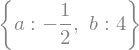

In [4]:
# solve equations
sol = solve(eqns)

# display result
sol

The solution is substituted into the function.

In [5]:
# substitute results into f
f = f.subs(sol)

# display result
f.equation()

<IPython.core.display.Math object>

The resulting function is plotted over the interval $-4\le x \le 4$

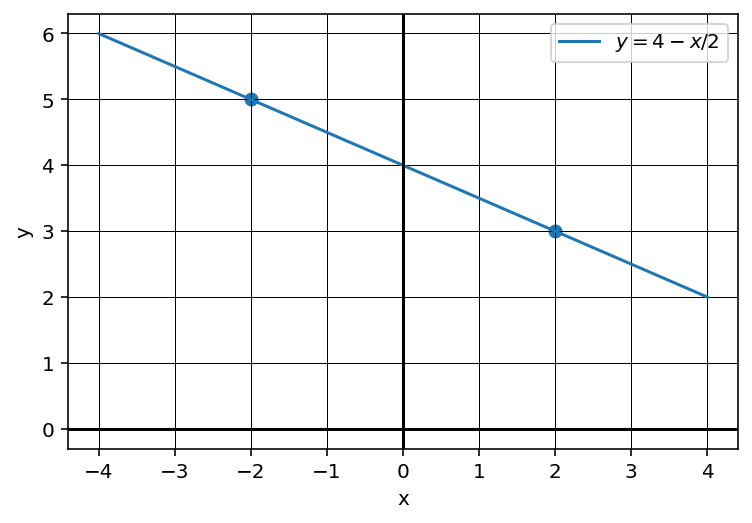

In [6]:
# define new plot
fig, ax = plt.subplots()

# the interval along the x-axis
lx = np.linspace(-4,4)

# plot f(x)
ax.plot(
    lx,f.lambdified(lx),
    label=f"$y={f(x)}$"
)

# insert the given points to the graph
ax.scatter(*zip(*pts))

# some additional commands
ax.grid(c='k',lw=0.5)
ax.axhline(0,c='k')
ax.axvline(0,c='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='upper right')